In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,6627.0,-0.918881,0.715596,1.317565,0.235763,-0.163076,0.905078,1.673909,-0.215787,1.306966,...,-0.218927,-0.089854,-0.203337,-0.410993,0.046915,-0.591839,-0.229448,-0.177511,212.18,0
1,169902.0,0.037621,0.829097,0.290610,-0.576833,0.377778,-1.148604,0.974904,-0.183932,0.017650,...,-0.264293,-0.603502,0.075537,0.028361,-0.504091,0.139128,0.244475,0.096777,2.28,0
2,42927.0,-6.854031,4.713261,-0.914453,-1.276068,-1.887370,4.074700,-5.740560,-16.963198,0.096228,...,16.666465,-5.381108,2.194857,-0.636934,0.262040,-0.289386,0.387905,0.001398,105.05,0
3,80171.0,-1.445167,1.106117,1.721651,-0.204892,0.516330,-0.418480,0.740728,0.017037,-0.530544,...,-0.176529,-0.585281,-0.154969,-0.058192,0.442834,-0.716728,-0.117906,0.172235,4.99,0
4,131170.0,-0.636349,1.593617,-0.392769,1.002223,0.576685,-0.821565,1.214157,0.034983,-0.883893,...,0.172335,0.727392,-0.173536,0.024792,0.082327,-0.384875,0.206971,0.165385,33.09,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [4]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 170 0.0017054061374557348
Number of frauds on y_train: 322 0.001739374689397377


In [5]:
(99683-176)/176

565.3806818181819

In [6]:
import EnhancedForest
import time
import datetime
import importlib
import numpy as np
importlib.reload(EnhancedForest)

<module 'EnhancedForest' from 'C:\\github_workspace\\ecoForest\\EnhancedForest.py'>

In [7]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)
def roc_metrix_mult(a, p):
#     print(p)
    if len(set(a)) == 1:
#         return "acc", metrics.accuracy_score(a, p)
        return "acc", len(a) - len(np.where(a == p)[0])
    return "roc", metrics.roc_auc_score(a, p)
def confusion_matrix_mult(a, p):
    if len(set(a)) == 1:
        return len(a), len(a) - len(np.where(a == p)[0])
    return metrics.confusion_matrix(a, p)

In [14]:
### stackplot
pass_data_len = []
pass_data_pos_len = []
### stackplot

# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []
pass_data_rate_train_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_test.copy()
test_y = np.array(([0.0] * len(X_test)))
all_data_mask = np.array([False] * len(X_test))
data_mask = np.array([False] * len(X_test))
real_y = y_test.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

enhancedDTree = EnhancedForest.EnhancedForest(len(X_train), len(X_test))
counter = 0
early_stop = 0
early_stop_up = 0

while 1:
    layer += 1
    print()
    print("layer:", layer)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    clf, data_mask, all_false_data_index, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_data_mask, test_y, real_y, verbose=False, \
                                      feval=roc_metrix_mult, dropout=None, criterion='gini', random_state=layer, \
                                      isFirst=isFirst, min_samples_leaf=10\
                                     )
    feval=roc_metrix_mult
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
#     if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
# #     if vaild_loss[1] < last_vaild_loss: 
#         if not isFirst: enhancedDTree.remove_last_items()
# #         early_stop_up += 1
#         if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
#             break
#         continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    
    # 打印信息
    pass_data_id = data_mask[data_mask==True]
#     all_false_data_index = np.where(all_data_mask == False)[0]
    X_test_np = X_test[all_false_data_index]
    print("%d [p:%d,1:%d/np:%d] " % (layer, len(pass_data_id),\
                                      len(np.where(y_train_np == 1)[0]), \
                                      len(X_test_np) - len(pass_data_id)))#, end="")
    ### stackplot
    pass_data_len.append(len(pass_data_id))
    pass_data_pos_len.append(len(np.where(y_train_np == 1)[0]))
    ### stackplot
    if len(pass_data_id) == 0: early_stop += 1
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
    ts = time.time()
    tm = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print(tm)
    
    
#     tmp_all_data_mask = all_false_data_index[~data_mask]
#     test_y[tmp_all_data_mask] = p_test[~data_mask]
    tmp_test_loss = metrics.roc_auc_score(y_test, test_y)
#     tmp_test_loss = metrics.accuracy_score(y_sub, test_y)
    best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    if len(pass_data_rate_lt) == 0:
        pass_data_rate_lt.append(len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(0)
    else:
        pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(data_mask[data_mask==True])/len(X_test))
        pass_data_rate_train_lt.append(pass_data_rate_train_lt[-1]+len(enhancedDTree.pass_data_y_list[-1])/len(X_train))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
    if layer > maxlayer or early_stop > 5:
        break
        
    all_data_mask[~all_data_mask] = data_mask


layer: 1


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


1 [p:0,1:315/np:0] 
train loss ('roc', 0.99772721162913203)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('roc', 0.96430852204596995)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('roc', 0.9857509373139467)
pass test loss (0, 0)
pass test loss now (0, 0)
2018-02-01 10:25:31
best test loss: 0.985750937314

layer: 2


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:181919/1:33|n:3205/1:282] 2 [p:97850,1:282/np:1833] 
train loss ('roc', 0.99841435606576923)
pass train loss ('roc', 0.9934809316125085)
pass train loss now ('roc', 0.9934809316125085)
vaild loss ('roc', 0.96192225744520288)
pass vaild loss ('roc', 0.67036637001065269)
pass vaild loss now ('roc', 0.67036637001065269)
test loss ('roc', 0.98403616691313855)
pass test loss ('roc', 0.82681112757874642)
pass test loss now ('roc', 0.82681112757874642)
2018-02-01 10:26:02
best test loss: 0.984036166913

layer: 3


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:393/1:0|n:2812/1:282] 3 [p:225,1:282/np:1608] 
train loss ('roc', 0.99824747420481397)
pass train loss ('roc', 0.99302052281825048)
pass train loss now ('acc', 393)
vaild loss ('roc', 0.96403691601977393)
pass vaild loss ('roc', 0.66945634622382899)
pass vaild loss now ('acc', 342)
test loss ('roc', 0.98402958070495372)
pass test loss ('roc', 0.825389217485893)
pass test loss now ('acc', 225)
2018-02-01 10:26:03
best test loss: 0.984029580705

layer: 4


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:263/1:0|n:2549/1:282] 4 [p:148,1:282/np:1460] 
train loss ('roc', 0.99822440448383987)
pass train loss ('roc', 0.99252625298685937)
pass train loss now ('acc', 263)
vaild loss ('roc', 0.96392848146009513)
pass vaild loss ('roc', 0.66864022659127342)
pass vaild loss now ('acc', 251)
test loss ('roc', 0.98404065234802296)
pass test loss ('roc', 0.82429265776039973)
pass test loss now ('acc', 148)
2018-02-01 10:26:05
best test loss: 0.984040652348

layer: 5


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:136/1:0|n:2413/1:282] 5 [p:67,1:282/np:1393] 
train loss ('roc', 0.99824950117955324)
pass train loss ('roc', 0.99228548195583088)
pass train loss now ('acc', 136)
vaild loss ('roc', 0.96091769391771009)
pass vaild loss ('roc', 0.6682036482806144)
pass vaild loss now ('acc', 133)
test loss ('roc', 0.98403207892185152)
pass test loss ('roc', 0.82380259475960316)
pass test loss now ('acc', 67)
2018-02-01 10:26:07
best test loss: 0.984032078922

layer: 6


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:71/1:0|n:2342/1:282] 6 [p:24,1:282/np:1369] 
train loss ('roc', 0.99820011514247187)
pass train loss ('roc', 0.99214073550458437)
pass train loss now ('acc', 71)
vaild loss ('roc', 0.96071233389221145)
pass vaild loss ('roc', 0.66798500078846346)
pass vaild loss now ('acc', 66)
test loss ('roc', 0.98403139758997016)
pass test loss ('roc', 0.82361841592149121)
pass test loss now ('acc', 24)
2018-02-01 10:26:09
best test loss: 0.98403139759

layer: 7


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:53/1:0|n:2289/1:282] 7 [p:26,1:282/np:1343] 
train loss ('roc', 0.99819853478928533)
pass train loss ('roc', 0.99201503995215223)
pass train loss now ('acc', 53)
vaild loss ('roc', 0.96399549187075773)
pass vaild loss ('roc', 0.667815533481664)
pass vaild loss now ('acc', 50)
test loss ('roc', 0.98403020525917806)
pass test loss ('roc', 0.82342232392575654)
pass test loss now ('acc', 26)
2018-02-01 10:26:10
best test loss: 0.984030205259

layer: 8


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:38/1:0|n:2251/1:282] 8 [p:22,1:282/np:1321] 
train loss ('roc', 0.99816823323470727)
pass train loss ('roc', 0.99192156745755522)
pass train loss now ('acc', 38)
vaild loss ('roc', 0.96080420051005899)
pass vaild loss ('roc', 0.66770474930888413)
pass vaild loss now ('acc', 37)
test loss ('roc', 0.98405376798673583)
pass test loss ('roc', 0.82325575089563818)
pass test loss now ('acc', 22)
2018-02-01 10:26:12
best test loss: 0.984053767987

layer: 9


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:40/1:0|n:2211/1:282] 9 [p:21,1:282/np:1300] 
train loss ('roc', 0.99817908957398915)
pass train loss ('roc', 0.99181678994671119)
pass train loss now ('acc', 40)
vaild loss ('roc', 0.96083475973091725)
pass vaild loss ('roc', 0.66757212876799488)
pass vaild loss now ('acc', 38)
test loss ('roc', 0.9840390057959767)
pass test loss ('roc', 0.8230854207330297)
pass test loss now ('acc', 21)
2018-02-01 10:26:14
best test loss: 0.984039005796

layer: 10


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:19/1:0|n:2192/1:282] 10 [p:12,1:282/np:1288] 
train loss ('roc', 0.99818199261408191)
pass train loss ('roc', 0.9917762195959452)
pass train loss now ('acc', 19)
vaild loss ('roc', 0.96380834026240902)
pass vaild loss ('roc', 0.66751421176814429)
pass vaild loss now ('acc', 17)
test loss ('roc', 0.98404337767554773)
pass test loss ('roc', 0.82299112285694931)
pass test loss now ('acc', 12)
2018-02-01 10:26:16
best test loss: 0.984043377676

layer: 11


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:41/1:0|n:2151/1:282] 11 [p:12,1:282/np:1276] 
train loss ('roc', 0.99818362450052467)
pass train loss ('roc', 0.99168033234940411)
pass train loss now ('acc', 41)
vaild loss ('roc', 0.96086437417541415)
pass vaild loss ('roc', 0.66738200304123563)
pass vaild loss now ('acc', 39)
test loss ('roc', 0.98404400222977229)
pass test loss ('roc', 0.82289684798222074)
pass test loss now ('acc', 12)
2018-02-01 10:26:17
best test loss: 0.98404400223

layer: 12


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:46/1:0|n:2105/1:282] 12 [p:30,1:282/np:1246] 
train loss ('roc', 0.99818092759345622)
pass train loss ('roc', 0.99156053998500959)
pass train loss now ('acc', 46)
vaild loss ('roc', 0.96394267028327063)
pass vaild loss ('roc', 0.66723857662235464)
pass vaild loss now ('acc', 43)
test loss ('roc', 0.98405723142379853)
pass test loss ('roc', 0.82265279442942973)
pass test loss now ('acc', 30)
2018-02-01 10:26:19
best test loss: 0.984057231424

layer: 13


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:15/1:0|n:2090/1:282] 13 [p:10,1:282/np:1236] 
train loss ('roc', 0.99819312379739633)
pass train loss ('roc', 0.99151950320523163)
pass train loss now ('acc', 15)
vaild loss ('roc', 0.95770837450625779)
pass vaild loss ('roc', 0.66718934968562027)
pass vaild loss now ('acc', 14)
test loss ('roc', 0.98404525133822096)
pass test loss ('roc', 0.8225759915474643)
pass test loss now ('acc', 10)
2018-02-01 10:26:21
best test loss: 0.984045251338

layer: 14


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:7/1:0|n:2083/1:282] 14 [p:10,1:282/np:1226] 
train loss ('roc', 0.99817067247549529)
pass train loss ('roc', 0.99150144785854699)
pass train loss now ('acc', 7)
vaild loss ('roc', 0.9608940315642911)
pass vaild loss ('roc', 0.66716830064060795)
pass vaild loss now ('acc', 7)
test loss ('roc', 0.98407256139112542)
pass test loss ('roc', 0.82249378652743066)
pass test loss now ('acc', 10)
2018-02-01 10:26:23
best test loss: 0.984072561391

layer: 15


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:5/1:0|n:2078/1:282] 15 [p:3,1:282/np:1223] 
train loss ('roc', 0.99816496946182187)
pass train loss ('roc', 0.99148595007905549)
pass train loss now ('acc', 5)
vaild loss ('roc', 0.96223677349596559)
pass vaild loss ('roc', 0.66715553738606748)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98405081554858409)
pass test loss ('roc', 0.82246939915688966)
pass test loss now ('acc', 3)
2018-02-01 10:26:24
best test loss: 0.984050815549

layer: 16


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:18/1:0|n:2060/1:282] 16 [p:6,1:282/np:1217] 
train loss ('roc', 0.9981718062071292)
pass train loss ('roc', 0.99144440344018558)
pass train loss now ('acc', 18)
vaild loss ('roc', 0.96386500966635058)
pass vaild loss ('roc', 0.66709688026022418)
pass vaild loss now ('acc', 17)
test loss ('roc', 0.98405444931861719)
pass test loss ('roc', 0.8224192745629807)
pass test loss now ('acc', 6)
2018-02-01 10:26:26
best test loss: 0.984054449319

layer: 17


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:5/1:0|n:2055/1:282] 17 [p:3,1:282/np:1214] 
train loss ('roc', 0.99816388726344407)
pass train loss ('roc', 0.99143056474401126)
pass train loss now ('acc', 5)
vaild loss ('roc', 0.96090273209569343)
pass vaild loss ('roc', 0.66708958396659179)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98404354800851801)
pass test loss ('roc', 0.82239421455705197)
pass test loss now ('acc', 3)
2018-02-01 10:26:28
best test loss: 0.984043548009

layer: 18


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:9/1:0|n:2046/1:282] 18 [p:3,1:282/np:1211] 
train loss ('roc', 0.9981641105742205)
pass train loss ('roc', 0.99140532589684438)
pass train loss now ('acc', 9)
vaild loss ('roc', 0.96393277589810233)
pass vaild loss ('roc', 0.66705711544685564)
pass vaild loss now ('acc', 9)
test loss ('roc', 0.98406620229356778)
pass test loss ('roc', 0.82236915607828798)
pass test loss now ('acc', 3)
2018-02-01 10:26:30
best test loss: 0.984066202294

layer: 19


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:18/1:0|n:2028/1:282] 19 [p:10,1:282/np:1201] 
train loss ('roc', 0.99817706259924976)
pass train loss ('roc', 0.99136511871471966)
pass train loss now ('acc', 18)
vaild loss ('roc', 0.96407023226983291)
pass vaild loss ('roc', 0.66699947145203697)
pass vaild loss now ('acc', 17)
test loss ('roc', 0.98406427185323753)
pass test loss ('roc', 0.82228766998080582)
pass test loss now ('acc', 10)
2018-02-01 10:26:32
best test loss: 0.984064271853

layer: 20


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:2022/1:282] 20 [p:4,1:282/np:1197] 
train loss ('roc', 0.99818580607503216)
pass train loss ('roc', 0.99135100079006477)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96384746259265364)
pass vaild loss ('roc', 0.66698307328069883)
pass vaild loss now ('acc', 5)
test loss ('roc', 0.98407681971538263)
pass test loss ('roc', 0.82225426775395805)
pass test loss now ('acc', 4)
2018-02-01 10:26:33
best test loss: 0.984076819715

layer: 21


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:2016/1:282] 21 [p:3,1:282/np:1194] 
train loss ('roc', 0.99818506743169511)
pass train loss ('roc', 0.99133820797073557)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96393908872197265)
pass vaild loss ('roc', 0.66696121394195951)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98404241245538282)
pass test loss ('roc', 0.822229217864614)
pass test loss now ('acc', 3)
2018-02-01 10:26:35
best test loss: 0.984042412455

layer: 22


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:2014/1:282] 22 [p:3,1:282/np:1191] 
train loss ('roc', 0.99816904058905265)
pass train loss ('roc', 0.99133267489205157)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96078364732975707)
pass vaild loss ('roc', 0.66695392781411234)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98407040384016842)
pass test loss ('roc', 0.82220755438664184)
pass test loss now ('acc', 3)
2018-02-01 10:26:37
best test loss: 0.98407040384

layer: 23


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:5/1:0|n:2009/1:282] 23 [p:4,1:282/np:1187] 
train loss ('roc', 0.99818156317028117)
pass train loss ('roc', 0.99132182201517249)
pass train loss now ('acc', 5)
vaild loss ('roc', 0.96376877989948784)
pass vaild loss ('roc', 0.66693571319094302)
pass vaild loss now ('acc', 5)
test loss ('roc', 0.98403877868534972)
pass test loss ('roc', 0.8221741588055903)
pass test loss now ('acc', 4)
2018-02-01 10:26:39
best test loss: 0.984038778685

layer: 24


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:22/1:0|n:1987/1:282] 24 [p:16,1:282/np:1171] 
train loss ('roc', 0.99818831402682839)
pass train loss ('roc', 0.99125252878311243)
pass train loss now ('acc', 22)
vaild loss ('roc', 0.96083475973091725)
pass vaild loss ('roc', 0.66686054555516716)
pass vaild loss now ('acc', 22)
test loss ('roc', 0.98408686936063039)
pass test loss ('roc', 0.82204601832204705)
pass test loss now ('acc', 16)
2018-02-01 10:26:41
best test loss: 0.984086869361

layer: 25


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:1981/1:282] 25 [p:6,1:282/np:1165] 
train loss ('roc', 0.99817091296402372)
pass train loss ('roc', 0.99123394945578336)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96088782180693288)
pass vaild loss ('roc', 0.66684415560774035)
pass vaild loss now ('acc', 5)
test loss ('roc', 0.98404774955511876)
pass test loss ('roc', 0.8219972995746323)
pass test loss now ('acc', 6)
2018-02-01 10:26:42
best test loss: 0.984047749555

layer: 26


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1977/1:282] 26 [p:4,1:282/np:1161] 
train loss ('roc', 0.99818080734919201)
pass train loss ('roc', 0.99122305329913696)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96084775470032668)
pass vaild loss ('roc', 0.66682958885357391)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98406597518294059)
pass test loss ('roc', 0.82196392134569118)
pass test loss now ('acc', 4)
2018-02-01 10:26:44
best test loss: 0.984065975183

layer: 27


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:30/1:0|n:1947/1:282] 27 [p:8,1:282/np:1153] 
train loss ('roc', 0.9981949961723674)
pass train loss ('roc', 0.99113927904387866)
pass train loss now ('acc', 30)
vaild loss ('roc', 0.96406243357041199)
pass vaild loss ('roc', 0.66673111338784252)
pass vaild loss now ('acc', 30)
test loss ('roc', 0.9840969757835345)
pass test loss ('roc', 0.82189920316703036)
pass test loss now ('acc', 8)
2018-02-01 10:26:46
best test loss: 0.984096975784

layer: 28


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:1941/1:282] 28 [p:2,1:282/np:1151] 
train loss ('roc', 0.99817934724026958)
pass train loss ('roc', 0.99112318930500742)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96401485119729347)
pass vaild loss ('roc', 0.66670927125472579)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98407750104726399)
pass test loss ('roc', 0.82188251773805532)
pass test loss now ('acc', 2)
2018-02-01 10:26:48
best test loss: 0.984077501047

layer: 29


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:3/1:0|n:1938/1:282] 29 [p:3,1:282/np:1148] 
train loss ('roc', 0.99817529329079091)
pass train loss ('roc', 0.99111555846089261)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96392018460586559)
pass vaild loss ('roc', 0.66669868162882195)
pass vaild loss now ('acc', 3)
test loss ('roc', 0.98404564878181844)
pass test loss ('roc', 0.82185884422790645)
pass test loss now ('acc', 3)
2018-02-01 10:26:50
best test loss: 0.984045648782

layer: 30


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:7/1:0|n:1931/1:282] 30 [p:5,1:282/np:1143] 
train loss ('roc', 0.99817170314061698)
pass train loss ('roc', 0.99109538274203046)
pass train loss now ('acc', 7)
vaild loss ('roc', 0.96403421052382954)
pass vaild loss ('roc', 0.66667320177093059)
pass vaild loss now ('acc', 7)
test loss ('roc', 0.98407511638567979)
pass test loss ('roc', 0.82181848938509683)
pass test loss now ('acc', 5)
2018-02-01 10:26:51
best test loss: 0.984075116386

layer: 31


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:1925/1:282] 31 [p:3,1:282/np:1140] 
train loss ('roc', 0.99817549942381523)
pass train loss ('roc', 0.9910723473557187)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96397297183784858)
pass vaild loss ('roc', 0.66665136344279852)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98404269634366659)
pass test loss ('roc', 0.82179346649345031)
pass test loss now ('acc', 3)
2018-02-01 10:26:53
best test loss: 0.984042696344

layer: 32


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:9/1:0|n:1916/1:282] 32 [p:5,1:282/np:1135] 
train loss ('roc', 0.99817302582752321)
pass train loss ('roc', 0.99104383537848806)
pass train loss now ('acc', 9)
vaild loss ('roc', 0.96387005133657089)
pass vaild loss ('roc', 0.66661893949733453)
pass vaild loss now ('acc', 9)
test loss ('roc', 0.9840575153120823)
pass test loss ('roc', 0.82175176506009828)
pass test loss now ('acc', 5)
2018-02-01 10:26:55
best test loss: 0.984057515312

layer: 33


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:13/1:0|n:1903/1:282] 33 [p:11,1:282/np:1124] 
train loss ('roc', 0.99817546506831123)
pass train loss ('roc', 0.99101188313909672)
pass train loss now ('acc', 13)
vaild loss ('roc', 0.96397037799729235)
pass vaild loss ('roc', 0.66657212891409456)
pass vaild loss now ('acc', 13)
test loss ('roc', 0.98405899153115839)
pass test loss ('roc', 0.82166206635276295)
pass test loss now ('acc', 11)
2018-02-01 10:26:57
best test loss: 0.984058991531

layer: 34


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:7/1:0|n:1896/1:282] 34 [p:3,1:282/np:1121] 
train loss ('roc', 0.99817149700759267)
pass train loss ('roc', 0.99098609115803904)
pass train loss now ('acc', 7)
vaild loss ('roc', 0.96402827561050386)
pass vaild loss ('roc', 0.66654665875987418)
pass vaild loss now ('acc', 7)
test loss ('roc', 0.98406546418402963)
pass test loss ('roc', 0.82163705304744616)
pass test loss now ('acc', 3)
2018-02-01 10:26:59
best test loss: 0.984065464184

layer: 35


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:3/1:0|n:1893/1:282] 35 [p:1,1:282/np:1120] 
train loss ('roc', 0.9981720123401534)
pass train loss ('roc', 0.99097978772429374)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96403451972336607)
pass vaild loss ('roc', 0.66654666072509061)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98405950253006913)
pass test loss ('roc', 0.82162871561743178)
pass test loss now ('acc', 1)
2018-02-01 10:27:01
best test loss: 0.98405950253

layer: 36


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:13/1:0|n:1880/1:282] 36 [p:6,1:282/np:1114] 
train loss ('roc', 0.99818659625162554)
pass train loss ('roc', 0.99094933263733176)
pass train loss now ('acc', 13)
vaild loss ('roc', 0.96086805021434829)
pass vaild loss ('roc', 0.66649986114701654)
pass vaild loss now ('acc', 13)
test loss ('roc', 0.98406671329247852)
pass test loss ('roc', 0.82158207683097595)
pass test loss now ('acc', 6)
2018-02-01 10:27:02
best test loss: 0.984066713292

layer: 37


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:1/1:0|n:1879/1:282] 37 [p:1,1:282/np:1113] 
train loss ('roc', 0.9981752245797828)
pass train loss ('roc', 0.99094789344882128)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.96401005860447775)
pass vaild loss ('roc', 0.66649622328562574)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98405126976983825)
pass test loss ('roc', 0.82157374055096144)
pass test loss now ('acc', 1)
2018-02-01 10:27:04
best test loss: 0.98405126977

layer: 38


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:5/1:0|n:1874/1:282] 38 [p:3,1:282/np:1110] 
train loss ('roc', 0.99818441467711794)
pass train loss ('roc', 0.9909406977419225)
pass train loss now ('acc', 5)
vaild loss ('roc', 0.96389132598245786)
pass vaild loss ('roc', 0.66648382337155754)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98405314343251149)
pass test loss ('roc', 0.82155279124982239)
pass test loss now ('acc', 3)
2018-02-01 10:27:06
best test loss: 0.984053143433

layer: 39


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:1872/1:282] 39 [p:3,1:282/np:1107] 
train loss ('roc', 0.99818032637213516)
pass train loss ('roc', 0.99093699260712498)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96397407121397838)
pass vaild loss ('roc', 0.66647671349421722)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98407188005924406)
pass test loss ('roc', 0.82152778482361177)
pass test loss now ('acc', 3)
2018-02-01 10:27:08
best test loss: 0.984071880059

layer: 40


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:1870/1:282] 40 [p:1,1:282/np:1106] 
train loss ('roc', 0.99818046379415148)
pass train loss ('roc', 0.99093130286607012)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96399287226357333)
pass vaild loss ('roc', 0.66646960377209641)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98407545705162036)
pass test loss ('roc', 0.82151944968649182)
pass test loss now ('acc', 1)
2018-02-01 10:27:10
best test loss: 0.984075457052

layer: 41


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:8/1:0|n:1862/1:282] 41 [p:4,1:282/np:1102] 
train loss ('roc', 0.99817640984467271)
pass train loss ('roc', 0.99090457594297054)
pass train loss now ('acc', 8)
vaild loss ('roc', 0.96087787588850848)
pass vaild loss ('roc', 0.66644050490221129)
pass vaild loss now ('acc', 8)
test loss ('roc', 0.98403383902921115)
pass test loss ('roc', 0.82148611082929213)
pass test loss now ('acc', 4)
2018-02-01 10:27:12
best test loss: 0.984033839029

layer: 42


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1858/1:282] 42 [p:4,1:282/np:1098] 
train loss ('roc', 0.99817677057746534)
pass train loss ('roc', 0.9908925363947112)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96085862821736079)
pass vaild loss ('roc', 0.66642595642011693)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98406733784670275)
pass test loss ('roc', 0.8214527746778939)
pass test loss now ('acc', 4)
2018-02-01 10:27:14
best test loss: 0.984067337847

layer: 43


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1854/1:282] 43 [p:2,1:282/np:1096] 
train loss ('roc', 0.99817233871744204)
pass train loss ('roc', 0.990876362968244)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96088911872721106)
pass vaild loss ('roc', 0.66641140857319903)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98406052452789106)
pass test loss ('roc', 0.82143610761676744)
pass test loss now ('acc', 2)
2018-02-01 10:27:15
best test loss: 0.984060524528

layer: 44


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:8/1:0|n:1846/1:282] 44 [p:2,1:282/np:1094] 
train loss ('roc', 0.99818321223447593)
pass train loss ('roc', 0.99084401823357859)
pass train loss now ('acc', 8)
vaild loss ('roc', 0.96390417494097513)
pass vaild loss ('roc', 0.66638231478472687)
pass vaild loss now ('acc', 8)
test loss ('roc', 0.984079658598221)
pass test loss ('roc', 0.82141944123196786)
pass test loss now ('acc', 2)
2018-02-01 10:27:17
best test loss: 0.984079658598

layer: 45


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1842/1:282] 45 [p:1,1:282/np:1093] 
train loss ('roc', 0.99817828221964389)
pass train loss ('roc', 0.99082999667450333)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96409079403901088)
pass vaild loss ('roc', 0.66636776884308935)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.9840459326701021)
pass test loss ('roc', 0.82141110829317787)
pass test loss now ('acc', 1)
2018-02-01 10:27:19
best test loss: 0.98404593267

layer: 46


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1838/1:282] 46 [p:2,1:282/np:1091] 
train loss ('roc', 0.99817249331721025)
pass train loss ('roc', 0.99081647181269017)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96399868693263491)
pass vaild loss ('roc', 0.66635322353646198)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98405132654749483)
pass test loss ('roc', 0.8213944429227914)
pass test loss now ('acc', 2)
2018-02-01 10:27:21
best test loss: 0.984051326547

layer: 47


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:1/1:0|n:1837/1:282] 47 [p:1,1:282/np:1090] 
train loss ('roc', 0.99817563684583144)
pass train loss ('roc', 0.99081205718441467)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.96393095505638726)
pass vaild loss ('roc', 0.66634958730902072)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98404916899653783)
pass test loss ('roc', 0.82138611049118471)
pass test loss now ('acc', 1)
2018-02-01 10:27:23
best test loss: 0.984049168997

layer: 48


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:8/1:0|n:1829/1:282] 48 [p:5,1:282/np:1085] 
train loss ('roc', 0.99818123679299275)
pass train loss ('roc', 0.99077938755013106)
pass train loss now ('acc', 8)
vaild loss ('roc', 0.96387340958709233)
pass vaild loss ('roc', 0.66632049891809153)
pass vaild loss now ('acc', 8)
test loss ('roc', 0.98405427898564679)
pass test loss ('roc', 0.82134445086881114)
pass test loss now ('acc', 5)
2018-02-01 10:27:25
best test loss: 0.984054278986

layer: 49


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:1827/1:282] 49 [p:3,1:282/np:1082] 
train loss ('roc', 0.99817093014177571)
pass train loss ('roc', 0.99077485832658696)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96388706589995499)
pass vaild loss ('roc', 0.66631322721716901)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98408170259386452)
pass test loss ('roc', 0.82131945712372956)
pass test loss now ('acc', 3)
2018-02-01 10:27:27
best test loss: 0.984081702594

layer: 50


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1823/1:282] 50 [p:1,1:282/np:1081] 
train loss ('roc', 0.99817340373806773)
pass train loss ('roc', 0.99076331995335853)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.96397267981606405)
pass vaild loss ('roc', 0.66629868429145989)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98406648618185133)
pass test loss ('roc', 0.8213111262133953)
pass test loss now ('acc', 1)
2018-02-01 10:27:29
best test loss: 0.984066486182

layer: 51


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:3/1:0|n:1820/1:282] 51 [p:0,1:282/np:1081] 
train loss ('roc', 0.99818475823215858)
pass train loss ('roc', 0.99075718802244006)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96105477237889625)
pass vaild loss ('roc', 0.6662877775137761)
pass vaild loss now ('acc', 3)
test loss ('roc', 0.98405740175676892)
pass test loss ('roc', 0.8213111262133953)
pass test loss now (0, 0)
2018-02-01 10:27:31
best test loss: 0.984057401757

layer: 52


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:1/1:0|n:1819/1:282] 52 [p:2,1:282/np:1079] 
train loss ('roc', 0.99817479513598206)
pass train loss ('roc', 0.99075393156322045)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.95774955816674567)
pass vaild loss ('roc', 0.66628414200056352)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98406580484997042)
pass test loss ('roc', 0.82129446489973523)
pass test loss now ('acc', 2)
2018-02-01 10:27:33
best test loss: 0.98406580485

layer: 53


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:1813/1:282] 53 [p:2,1:282/np:1077] 
train loss ('roc', 0.99818340118974824)
pass train loss ('roc', 0.99073687364153218)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.9639885348811863)
pass vaild loss ('roc', 0.66626266043271898)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98404831733168641)
pass test loss ('roc', 0.82127780426205232)
pass test loss now ('acc', 2)
2018-02-01 10:27:34
best test loss: 0.984048317332

layer: 54


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:6/1:0|n:1807/1:282] 54 [p:2,1:282/np:1075] 
train loss ('roc', 0.99818748949473102)
pass train loss ('roc', 0.9907199821704088)
pass train loss now ('acc', 6)
vaild loss ('roc', 0.96386665873054533)
pass vaild loss ('roc', 0.66624084960382723)
pass vaild loss now ('acc', 6)
test loss ('roc', 0.98405461965158736)
pass test loss ('roc', 0.82126317284188532)
pass test loss now ('acc', 2)
2018-02-01 10:27:36
best test loss: 0.984054619652

layer: 55


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:1/1:0|n:1806/1:282] 55 [p:0,1:282/np:1075] 
train loss ('roc', 0.99817604911188018)
pass train loss ('roc', 0.99071821414075278)
pass train loss now ('acc', 1)
vaild loss ('roc', 0.96393531820540246)
pass vaild loss ('roc', 0.66623721460451146)
pass vaild loss now ('acc', 1)
test loss ('roc', 0.98408789135845209)
pass test loss ('roc', 0.82126317284188532)
pass test loss now (0, 0)
2018-02-01 10:27:38
best test loss: 0.984087891358

layer: 56


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:8/1:0|n:1798/1:282] 56 [p:1,1:282/np:1074] 
train loss ('roc', 0.99817117063030414)
pass train loss ('roc', 0.99068406619704263)
pass train loss now ('acc', 8)
vaild loss ('roc', 0.9639803325045927)
pass vaild loss ('roc', 0.66620830136349007)
pass vaild loss now ('acc', 8)
test loss ('roc', 0.98407738749195062)
pass test loss ('roc', 0.82125484309390029)
pass test loss now ('acc', 1)
2018-02-01 10:27:40
best test loss: 0.984077387492

layer: 57


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:3/1:0|n:1795/1:282] 57 [p:1,1:282/np:1073] 
train loss ('roc', 0.99817568837908766)
pass train loss ('roc', 0.99067512590993734)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96086882321318956)
pass vaild loss ('roc', 0.66619739755269169)
pass vaild loss now ('acc', 3)
test loss ('roc', 0.98406745140201646)
pass test loss ('roc', 0.8212465135148842)
pass test loss now ('acc', 1)
2018-02-01 10:27:42
best test loss: 0.984067451402

layer: 58


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:5/1:0|n:1790/1:282] 58 [p:4,1:282/np:1069] 
train loss ('roc', 0.99817496691350238)
pass train loss ('roc', 0.99065984033878374)
pass train loss now ('acc', 5)
vaild loss ('roc', 0.96397274852707215)
pass vaild loss ('roc', 0.6661792253278388)
pass vaild loss now ('acc', 5)
test loss ('roc', 0.98407795526851816)
pass test loss ('roc', 0.82121319688840644)
pass test loss now ('acc', 4)
2018-02-01 10:27:44
best test loss: 0.984077955269

layer: 59


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:1788/1:282] 59 [p:0,1:282/np:1069] 
train loss ('roc', 0.9981750699800146)
pass train loss ('roc', 0.99065283363412693)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96407182980077155)
pass vaild loss ('roc', 0.66617195671548302)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98407869337805598)
pass test loss ('roc', 0.82121319688840644)
pass test loss now (0, 0)
2018-02-01 10:27:46
best test loss: 0.984078693378

layer: 60


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:3/1:0|n:1785/1:282] 60 [p:2,1:282/np:1067] 
train loss ('roc', 0.99818388216680498)
pass train loss ('roc', 0.99064306777638589)
pass train loss now ('acc', 3)
vaild loss ('roc', 0.96407619294978686)
pass vaild loss ('roc', 0.66616188066386095)
pass vaild loss now ('acc', 3)
test loss ('roc', 0.984086415139376)
pass test loss ('roc', 0.82119653958884808)
pass test loss now ('acc', 2)
2018-02-01 10:27:48
best test loss: 0.984086415139

layer: 61


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:4/1:0|n:1781/1:282] 61 [p:3,1:282/np:1064] 
train loss ('roc', 0.99817948466228579)
pass train loss ('roc', 0.99063252678440061)
pass train loss now ('acc', 4)
vaild loss ('roc', 0.9639920219648479)
pass vaild loss ('roc', 0.66614767499334615)
pass vaild loss now ('acc', 4)
test loss ('roc', 0.98405206465703299)
pass test loss ('roc', 0.82117155490649474)
pass test loss now ('acc', 3)
2018-02-01 10:27:50
best test loss: 0.984052064657

layer: 62


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:0/1:0|n:1781/1:282] 62 [p:0,1:282/np:1064] 
train loss ('roc', 0.99816567374965515)
pass train loss ('roc', 0.99063252678440061)
pass train loss now (0, 0)
vaild loss ('roc', 0.9640018476390082)
pass vaild loss ('roc', 0.66614767499334615)
pass vaild loss now (0, 0)
test loss ('roc', 0.98408465503201636)
pass test loss ('roc', 0.82117155490649474)
pass test loss now (0, 0)
2018-02-01 10:27:52
best test loss: 0.984084655032

layer: 63


C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob
C:\github_workspace\ecoForest\EnhancedForest.py:93: RuntimeWarning: invalid value encountered in true_divide
  node_id_freq = node_id_cnt_m/node_id_cnt_a
C:\github_workspace\ecoForest\EnhancedForest.py:94: RuntimeWarning: divide by zero encountered in true_divide
  node_id_lift = node_id_freq/node_id_y_prob


[p:2/1:0|n:1779/1:282] 63 [p:0,1:282/np:1064] 
train loss ('roc', 0.9981829202126915)
pass train loss ('roc', 0.99062750442365521)
pass train loss now ('acc', 2)
vaild loss ('roc', 0.96093043980971526)
pass vaild loss ('roc', 0.66614040708208022)
pass vaild loss now ('acc', 2)
test loss ('roc', 0.98406994961891403)
pass test loss ('roc', 0.82117155490649474)
pass test loss now (0, 0)
2018-02-01 10:27:54
best test loss: 0.984069949619


In [15]:
pass_data_rate_lt

[0.0,
 0.9816117091179037,
 0.9838688642998304,
 0.9853535708194978,
 0.9860257014736715,
 0.986266464693077,
 0.9865272915140997,
 0.986747991131888,
 0.9869586589488679,
 0.9870790405585707,
 0.9871994221682734,
 0.9875003761925303,
 0.9876006942006159,
 0.9877010122087015,
 0.9877311076111273,
 0.9877912984159787,
 0.9878213938184044,
 0.9878514892208301,
 0.9879518072289157,
 0.9879919344321499,
 0.9880220298345757,
 0.9880521252370014,
 0.9880922524402356,
 0.9882527612531726,
 0.988312952058024,
 0.9883530792612583,
 0.9884333336677268,
 0.9884533972693439,
 0.9884834926717696,
 0.9885336516758124,
 0.9885637470782381,
 0.988613906082281,
 0.9887242558911752,
 0.9887543512936009,
 0.9887643830944095,
 0.9888245738992609,
 0.9888346057000695,
 0.9888647011024952,
 0.988894796504921,
 0.9889048283057296,
 0.9889449555089638,
 0.988985082712198,
 0.9890051463138151,
 0.9890252099154322,
 0.9890352417162408,
 0.9890553053178579,
 0.9890653371186665,
 0.9891154961227093,
 0.9891455915

In [17]:
pass_data_rate_train_lt

[0,
 0.9826872798772714,
 0.9848101812838962,
 0.9862308506730624,
 0.9869654933990191,
 0.9873490201162465,
 0.9876353147079796,
 0.9878405825284675,
 0.9880566539184548,
 0.9881592878286987,
 0.9883807610034356,
 0.988629243101921,
 0.9887102698731662,
 0.988748082366414,
 0.9887750912901624,
 0.9888723234156567,
 0.9888993323394051,
 0.9889479484021522,
 0.9890451805276465,
 0.9890775912361446,
 0.9891100019446427,
 0.989120805514142,
 0.9891478144378905,
 0.9892666537023834,
 0.9892990644108816,
 0.9893206715498802,
 0.9894827250923707,
 0.9895151358008688,
 0.9895313411551179,
 0.9895691536483656,
 0.9896015643568637,
 0.9896501804196108,
 0.9897204036213567,
 0.9897582161146045,
 0.9897744214688535,
 0.9898446446705994,
 0.9898500464553491,
 0.9898770553790975,
 0.9898878589485969,
 0.9898986625180962,
 0.9899418767960937,
 0.9899634839350924,
 0.989985091074091,
 0.9900283053520885,
 0.9900499124910872,
 0.9900715196300859,
 0.9900769214148356,
 0.9901201356928331,
 0.9901309392

In [93]:
y_test, test_y

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([  8.43700939e-05,   8.56291435e-05,   1.46813747e-04, ...,
          9.44118448e-05,   8.39224793e-05,   1.18323335e-04]))

In [96]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [97]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 98013, 98196, 98275, 98334, 98403, 98432, 98463, 98484, 98489, 98500, 98507, 98511, 98522, 98529, 98538, 98545, 98550, 98553, 98560, 98567, 98575, 98578, 98584, 98590, 98593, 98595, 98601, 98603, 98608, 98609, 98612, 98620, 98622, 98625, 98627, 98630, 98631, 98634, 98637, 98643, 98644, 98646, 98648, 98650, 98650, 98652, 98652, 98652, 98653, 98658, 98658]
[0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[99683, 1670, 1487, 1408, 1349, 1280, 1251, 1220, 1199, 1194, 1183, 1176, 1172, 1161, 1154, 1145, 1138, 1133, 1130, 1123, 1116, 1108, 1105, 1099, 1093, 1090, 1088, 1082, 1080, 1075, 1074, 1071, 1063, 1061, 1058, 1056, 1053, 1052, 1049, 1046, 1040, 1039, 1037, 1035, 1033, 1033, 1031, 1031, 1031, 1030, 1025, 1025]
[316, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 2

In [85]:
pass_data_len_ = []
for index, item in enumerate(pass_data_len):
    if index == 0: 
        pass_data_len_.append(item)
    else:
        pass_data_len_.append(item+pass_data_len_[-1])

In [88]:
print(pass_data_len_)
print(list(np.array([316]*len(pass_data_len)) - np.array(pass_data_pos_len)))
print(list(np.array([99683]*len(pass_data_len)) - np.array(pass_data_len_)))
print(pass_data_pos_len)

[0, 97821, 98103, 98240, 98347, 98375, 98410, 98434, 98456, 98467, 98482, 98493, 98504, 98515, 98521, 98532, 98533, 98534, 98536, 98545, 98552, 98552, 98557, 98570, 98572, 98576, 98583, 98584, 98590, 98591, 98598, 98599, 98602, 98604, 98604, 98609, 98612, 98614, 98614, 98614, 98617, 98618, 98620, 98623, 98625, 98628, 98629, 98630, 98630]
[0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[99683, 1862, 1580, 1443, 1336, 1308, 1273, 1249, 1227, 1216, 1201, 1190, 1179, 1168, 1162, 1151, 1150, 1149, 1147, 1138, 1131, 1131, 1126, 1113, 1111, 1107, 1100, 1099, 1093, 1092, 1085, 1084, 1081, 1079, 1079, 1074, 1071, 1069, 1069, 1069, 1066, 1065, 1063, 1060, 1058, 1055, 1054, 1053, 1053]
[316, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 29

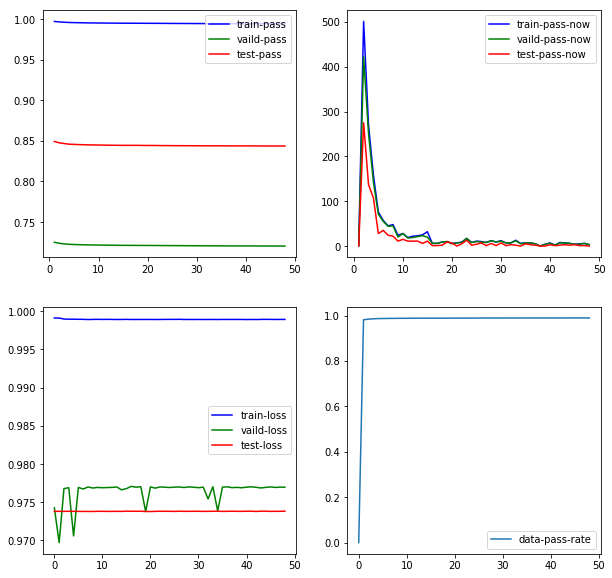

In [89]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

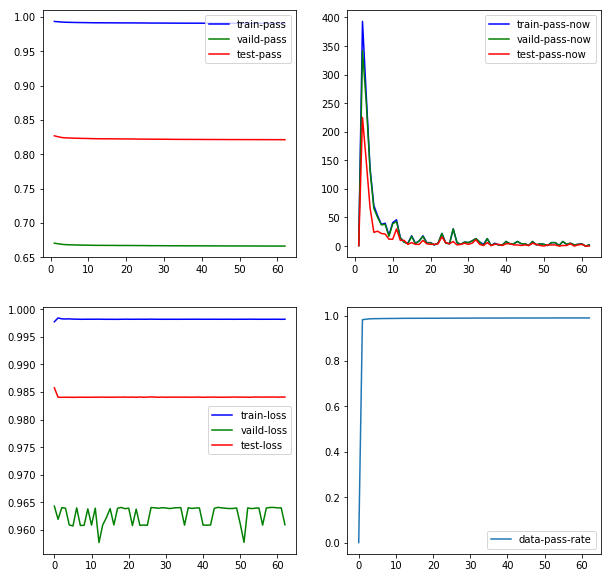

In [18]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [36]:
import numpy as np

import EnhancedForest_multiclass
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

In [29]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_test, y_test, num_class=2, flag="creditcard", isLRStacker=True)
decoForest.set_parameter(criterion="gini", dropout=0.5, min_samples_leaf=10)
decoForest.fit(n_estimators=200, kfold=3, feval=acc_metrix_mult)


2018-01-27 15:26:17 layer: 1
all data ('roc', 0.8695777887007381)
train loss ('roc', 0.8695777887007381)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('roc', 0.86648865878226045)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('roc', 0.8614005647276346)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2018-01-27 15:28:31 layer: 2
all data ('roc', 0.86959131698567638)
[p:3356/1:211|n:181768/1:115] 
train loss ('roc', 0.86959131698567638)
pass train loss ('roc', 0.98182249715564462)
pass train loss now ('roc', 0.98182249715564462)
vaild loss ('roc', 0.86342658543365913)
pass vaild loss ('roc', 0.97897588137342817)
pass vaild loss now ('roc', 0.97897588137342817)
test loss ('roc', 0.86743973391480855)
pass test loss ('roc', 0.98038551706173482)
pass test loss now ('roc', 0.98038551706173482)
2 [p:1855/np:97828] 

2018-01-27 15:31:15 layer: 3
all data ('roc', 0.63911391977872767)
[p:213/1:32|n:181555/1:83] 
train loss ('roc', 0.86191989967224703)

In [23]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.99949840995957184,
 [(0, 0.99944825095552903),
  (1, 0.99949840995957184),
  (2, 0.99944825095552903),
  (3, 0.99946831455714613),
  (4, 0.99945828275633763),
  (5, 0.99945828275633763),
  (6, 0.99947834635795474),
  (7, 0.99946831455714613),
  (8, 0.99946831455714613),
  (9, 0.99945828275633763),
  (10, 0.99945828275633763),
  (11, 0.99944825095552903),
  (12, 0.99944825095552903),
  (13, 0.99945828275633763),
  (14, 0.99944825095552903),
  (15, 0.99944825095552903),
  (16, 0.99944825095552903),
  (17, 0.99944825095552903),
  (18, 0.99946831455714613),
  (19, 0.99945828275633763),
  (20, 0.99944825095552903)])

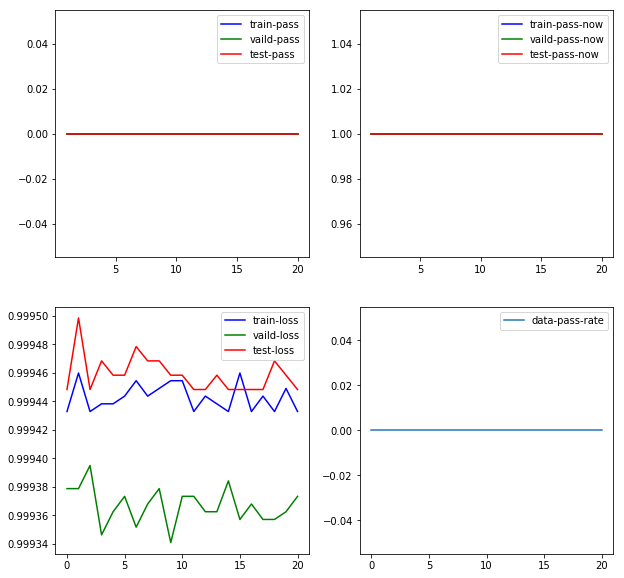

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()